<a href="https://colab.research.google.com/github/rzunick/MNA-Vision-Computacional-Equipo-18/blob/main/9_4_Segmentaci%C3%B3n_Otsu_Equipo18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión Computacional para Imágenes y Video**
Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

##**Semana 9: Segmentación Otsu**


##**Equipo 18**
**Integrantes del equipo:** 
* Ronald David Zuniga - A01686240
* David Valles Canedo - A01191310
* Héctor Raúl Vázquez - A00565542
* Andrea Vázquez Tadeo - A01730613
* Miguel Angel Villanueva - A01793890

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np
import cv2 

In [ ]:
#Código para importar carpeta de imágenes en Git-Hub
!git clone https://github.com/rzunick/MNA-Vision-Computacional-Equipo-18.git

# Modificar las rutas locales incluyendo: /content/MNA-Vision-Computacional-Equipo-18/

Cloning into 'MNA-Vision-Computacional-Equipo-18'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 311 (delta 68), reused 37 (delta 37), pack-reused 224
Receiving objects: 100% (311/311), 123.43 MiB | 11.91 MiB/s, done.
Resolving deltas: 100% (113/113), done.
Updating files: 100% (90/90), done.


## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

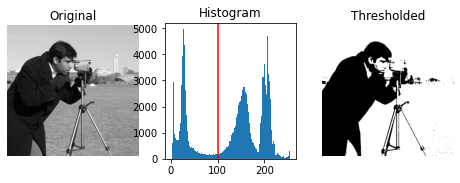

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




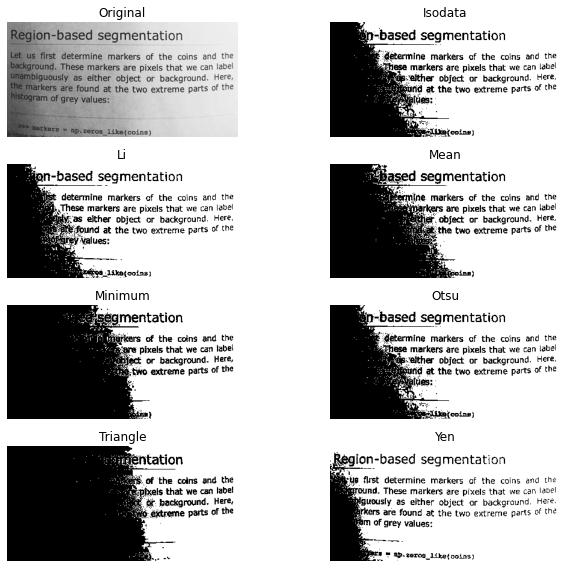

In [ ]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

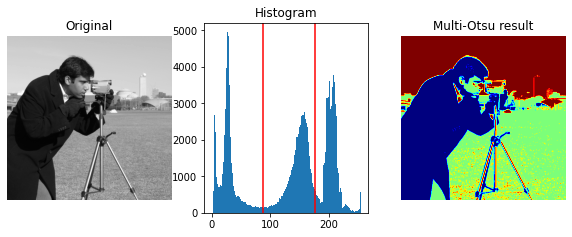

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# **Investigación**

Nombrado en honor a Nobuyuki Otsu este método de segmentación es usado para encontrar el “threshold” (Medida o proporción) de manera automática.

El método Otsu, nombrado así en honor a Nobuyuki Otsu, es un procedimiento que es utilizado para encontrar el “threshold” (Medida o proporción) de manera automática en una imagen digital. En su forma más simple, este método separa los pixeles de la imagen en dos clases; lo que se tiene en frente y el fondo. Las operaciones de segmentación de este método se dice que es equivalente a un método de k-means óptimo realizado sobre el histograma de la imagen. En su versión más extensa de este método, es capaz de segmentar en diferentes capas.

El método de Otsu tiene algunas limitaciones:
* Imágenes con mucho ruido
* Reconocer objetos pequeños en las imágenes
* Diferentes iluminaciones en la misma imagen
* Cuando a varianza en la “intra-class” es mayor que la de la “inter-class”

Este método tiene varias aplicaciones, entre las cuales destaca el reconocimiento de texto ( OCR por sus siglas en inglés). Ya que cuando el método tiene mejores resultados es cuando la imagen tiene una sola iluminación, como la de un escáner. De manera práctica, este método fue ya implementado y puede ser utilizado de manera gratuita en los programas “Gimp” e “IrfanView”.

De manera muy simple, este método encuentra un “umbral” del valor de los pixeles, y con base en este, segmenta (divide) a los pixeles de una imagen digital (Previamente convertida a escala de grises) en dos clases. Encontrando de esta forma la clase con los pixeles que pertenecen al objeto en la imagen y la clase con los pixeles que pertenecen al fondo.


Una de las ventajas más fuertes de este método es que no necesita de supervisión humana (es totalmente automático), ni información previa de la imagen a tratar. Aunque, para imágenes del mundo real puede ser un poco tardado, debido a que este tipo de imágenes normalmente tienen ruido y la iluminación no es la más adecuada para este método.


**Referencias:**
* Nobuyuki Otsu, “A threshold selection method from gray-level histogram”, IEEE Transactions on System Man Cybernetics, Vol. SMC-9, No. 1, 1979.
* Jorge Antonio Parra Serquen Seguir Technical Support en ARQSYSTEM. (n.d.). Segmentación por Umbralización Método de Otsu. Share and Discover Knowledge on SlideShare. Retrieved March 12, 2023, from https://es.slideshare.net/JorgeAntonioParraSerquen/segmentacin-por-umbralizacin-mtodo-de-otsu 
* Wikimedia Foundation. (n.d.). Método del Valor umbral. Wikipedia. Retrieved March 12, 2023, from https://es.wikipedia.org/wiki/M%C3%A9todo_del_valor_umbral#Aplicaciones 
* Wikimedia Foundation. (2023, February 24). Otsu's method. Wikipedia. Retrieved March 12, 2023, from https://en.wikipedia.org/wiki/Otsu's_method#Limitations_and_variations 
* Module: Filters. Module: filters - skimage v0.20.0 docs. (n.d.). Retrieved March 12, 2023, from https://scikit-image.org/docs/stable/api/skimage.filters.html#threshold-otsu 



# **Ejercicios**

### Importar Imágenes

In [ ]:
# Importar rutas de imágenes para ejercicio
path1 = "/content/MNA-Vision-Computacional-Equipo-18/data/saturn.jpg"
path2 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu4.jpg"
path3 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu1.jpg"
path4 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu2.jpg"
path5 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu3.jpg"

# Cargar imágenes 
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)

# Cargar imágenes en escala de grises
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2GRAY)

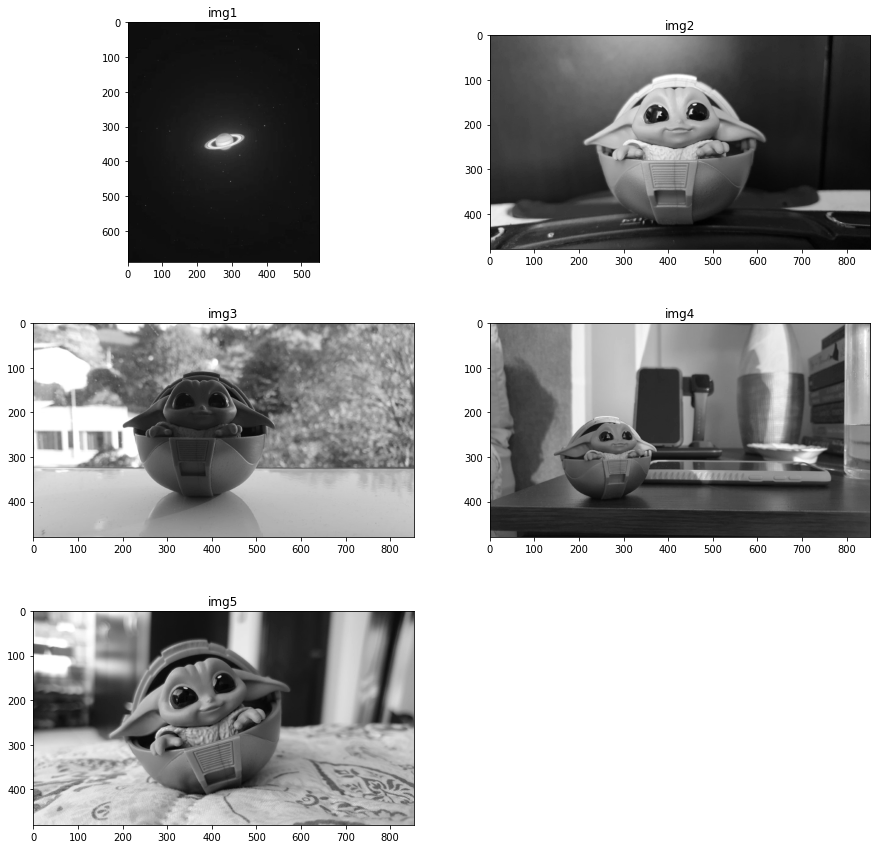

In [ ]:
# Mostrar imágenes importadas
images = [img1, img2, img3, img4, img5]
plt.figure(figsize=(15, 15))

for i, img in enumerate(images):
    plt.subplot(3, 2, i+1)
    plt.imshow(img, cmap="gray")
    plt.title("img{}".format(i+1))

## Ejercicio 1 - Pruebas con backround sólido

Se utilizan Imágenes 1 y 2.

### Simple Thresholding

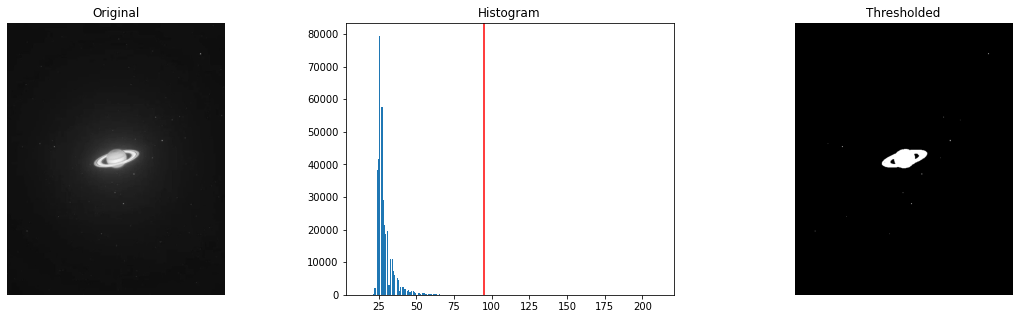

In [ ]:
image = img1
thresh = threshold_otsu(image)
binary1 = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary1, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

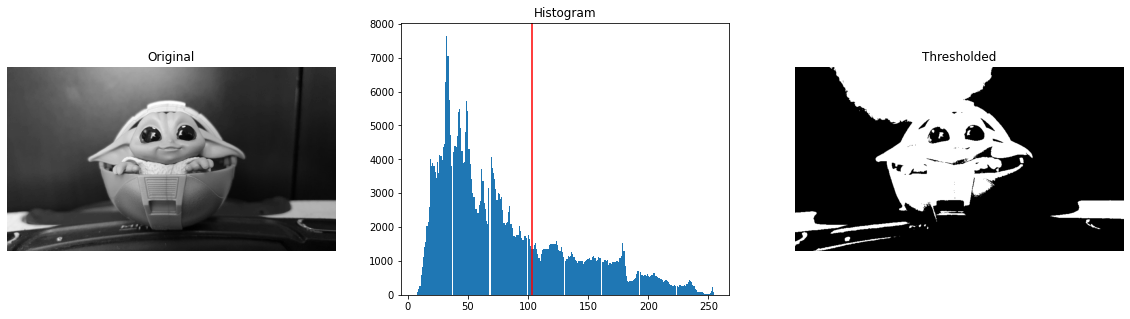

In [ ]:
image = img2
thresh = threshold_otsu(image)
binary2 = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary2, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

### Multi Thresholding

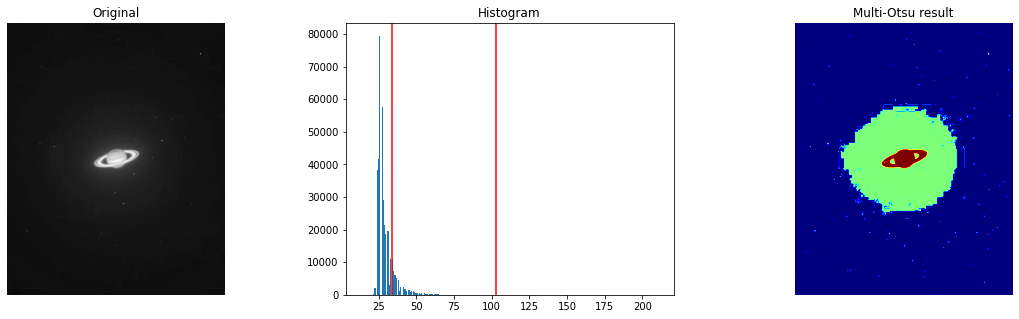

In [ ]:
# Segmentación Imágen 1
image = img1

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)

# Using the threshold values, we generate the three regions.
regions_1 = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions_1, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

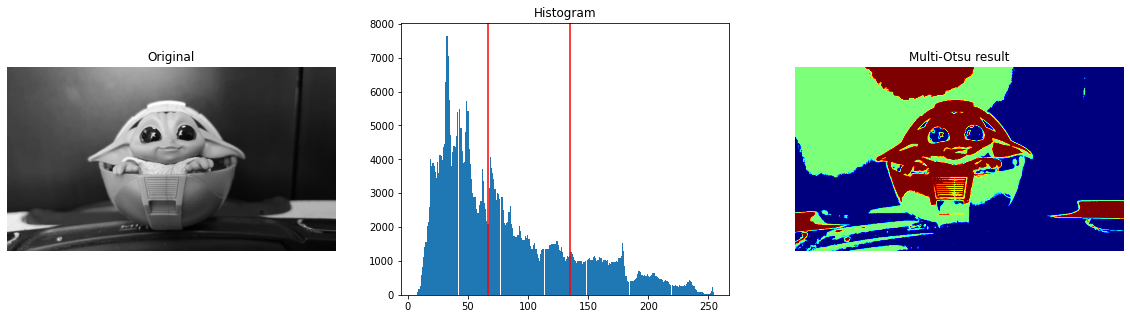

In [ ]:
# Segmentación Imágen 2
image = img2

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)

# Using the threshold values, we generate the three regions.
regions1 = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions1, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

## Ejercicio 2 - Pruebas con background complejo

Se utilizan Imágenes 3, 4, y 5.

### Simple Thresholding

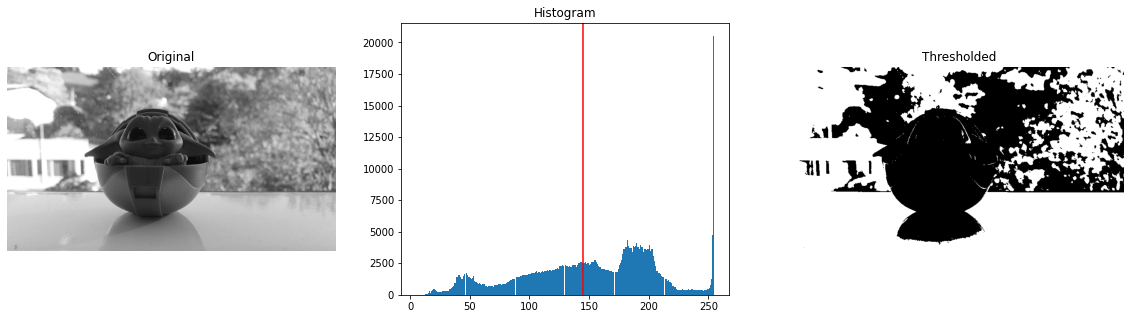

In [ ]:
# Segmentación Imágen 3
image = img3
thresh = threshold_otsu(image)
binary_1 = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary_1, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

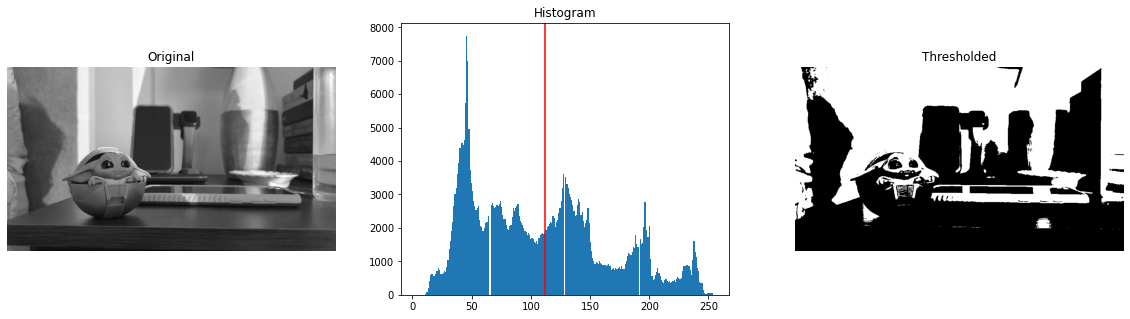

In [ ]:
# Segmentación Imágen 4
image = img4
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

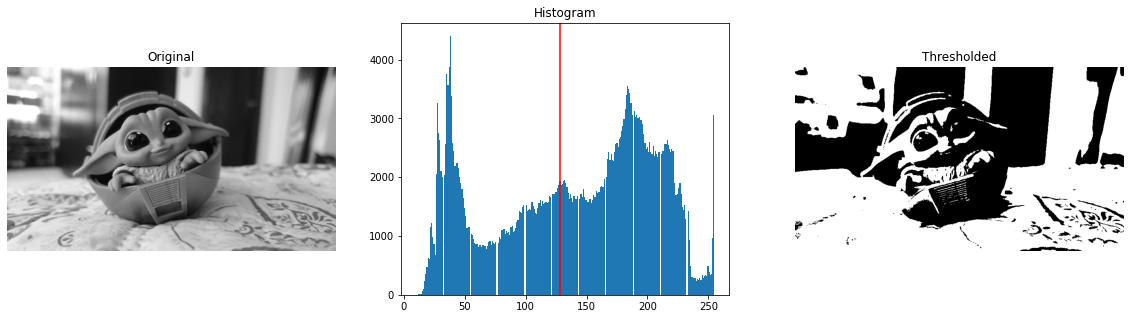

In [ ]:
# Segmentación Imágen 5
image = img5
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

### Multi Thresholding 

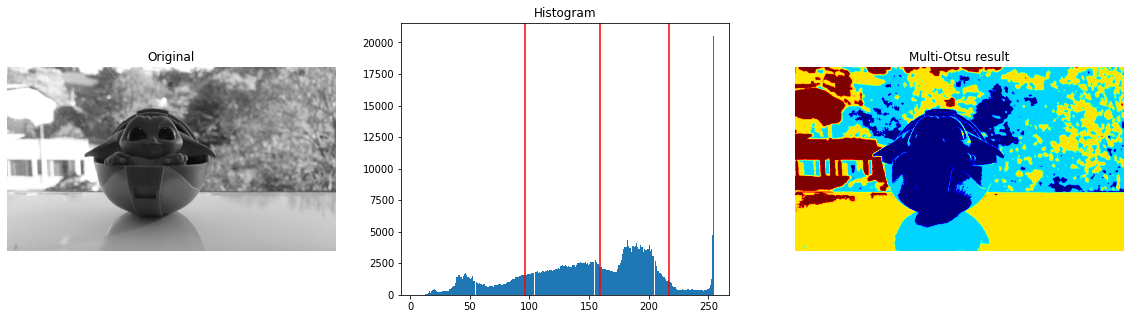

In [ ]:
# Segmentación Imágen 3
image = img3

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=4)

# Using the threshold values, we generate the three regions.
regions_1 = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions_1, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

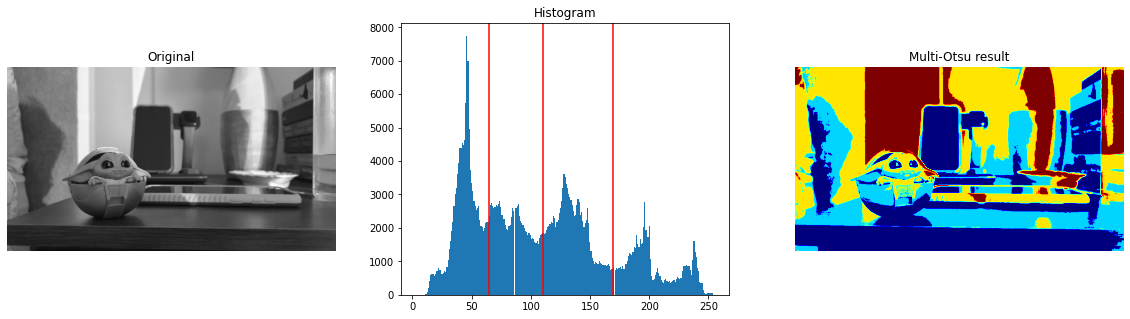

In [ ]:
# Segmentación Imágen 4
image = img4

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=4)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

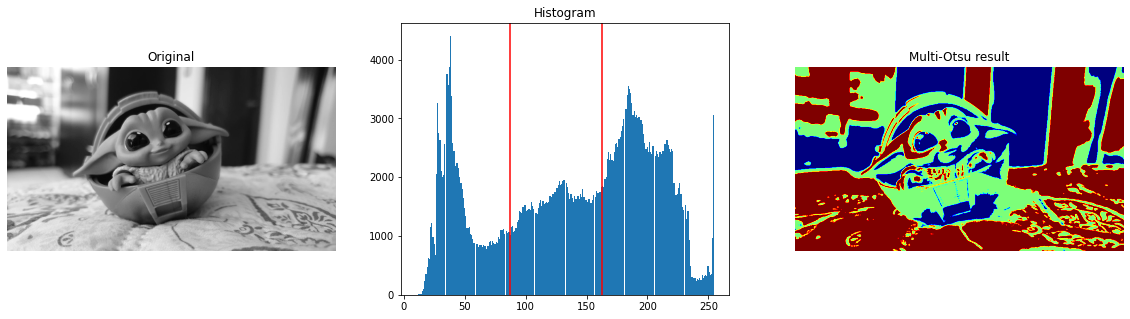

In [ ]:
# Segmentación Imágen 5
image = img5

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

## Ejercicio 3 - Pruebas con ventanas de diferentes tamaños

### Multi Window Simple Thresholding

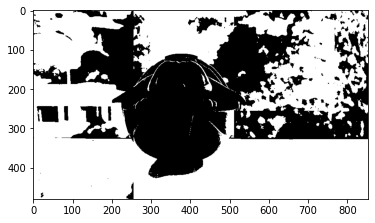

In [ ]:
# Load the image
img = img3

# Set the window size for partitioning the image
win_size = 256

# Create empty array for storing the thresholded sub-images
thresholded_1 = np.zeros_like(img)

# Partition the image into multiple windows and apply threshold_otsu algorithm to each window
for i in range(0, img.shape[0], win_size):
    for j in range(0, img.shape[1], win_size):
        # Extract the sub-image
        sub_img = img[i:i+win_size, j:j+win_size]

        # Apply threshold_otsu algorithm to the sub-image
        threshold = threshold_otsu(sub_img)
        thresholded_1[i:i+win_size, j:j+win_size] = (sub_img > threshold) * 255

# Display the thresholded image
plt.imshow(thresholded_1, cmap='gray')
plt.show()

(-0.5, 852.5, 479.5, -0.5)

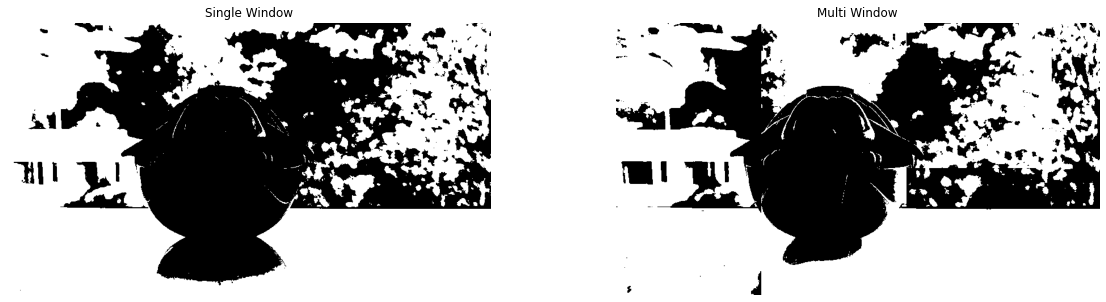

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Mostrando comparación entre aplicación de SIMPLE THRESHOLDING con single window y multi window
ax[0].imshow(binary_1, cmap='gray')
ax[0].set_title('Single Window')
ax[0].axis('off')

ax[1].imshow(thresholded_1, cmap='gray')
ax[1].set_title('Multi Window')
ax[1].axis('off')


### Multi Window Multi Thresholding

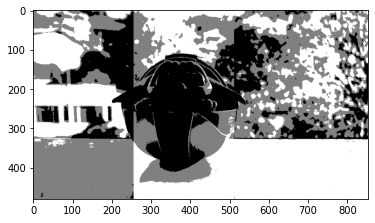

In [ ]:
# Load the image
img = img3

# Set the window size for partitioning the image
win_size = 256

# Create empty array for storing the thresholded sub-images
thresholded_2 = np.zeros_like(img)

# Partition the image into multiple windows and apply threshold_multiotsu algorithm to each window
for i in range(0, img.shape[0], win_size):
    for j in range(0, img.shape[1], win_size):
        # Extract the sub-image
        sub_img = img[i:i+win_size, j:j+win_size]

        # Apply threshold_multiotsu algorithm to the sub-image
        thresholds = threshold_multiotsu(sub_img)
        regions = np.digitize(sub_img, bins=thresholds)

        # Store the thresholded result in the thresholded array
        thresholded_2[i:i+win_size, j:j+win_size] = regions

# Display the thresholded image
plt.imshow(thresholded_2, cmap='gray')
plt.show()

(-0.5, 852.5, 479.5, -0.5)

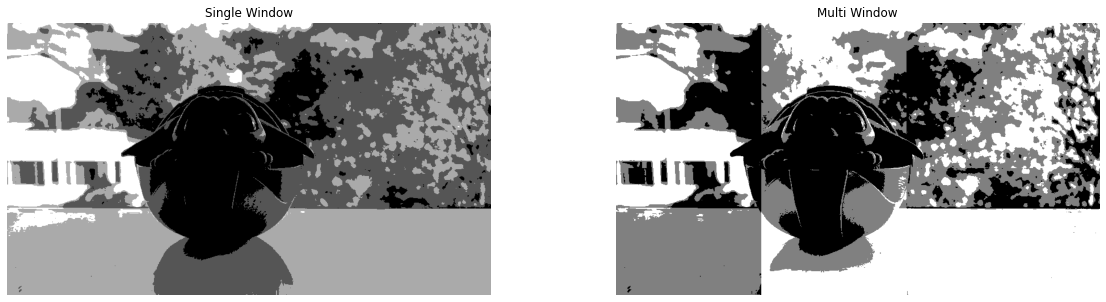

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Mostrando comparación entre aplicación de SIMPLE THRESHOLDING con single window y multi window
ax[0].imshow(regions_1, cmap='gray')
ax[0].set_title('Single Window')
ax[0].axis('off')

ax[1].imshow(thresholded_2, cmap='gray')
ax[1].set_title('Multi Window')
ax[1].axis('off')

## Ejercicio 4 - Pruebas de diferentes algoritmos

Utilizando la función try_all_threshold de skimage se ilustra una comparación rápida entre el rendimiento de diferentes algoritmos de segmentación.

In [ ]:
from skimage.filters import try_all_threshold

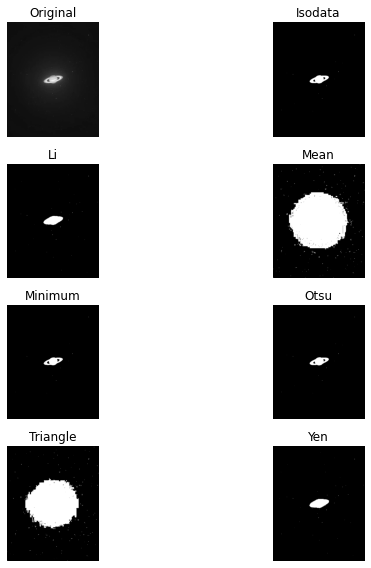

In [ ]:
# Segmentación Imagen 1
img = img1

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

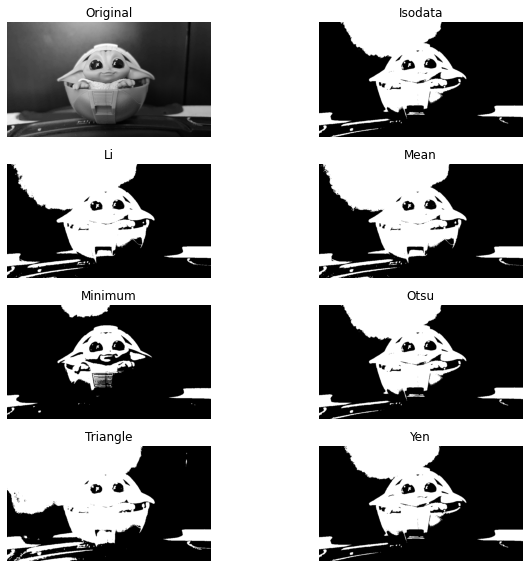

In [ ]:
# Segmentación Imagen 2
img = img2

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

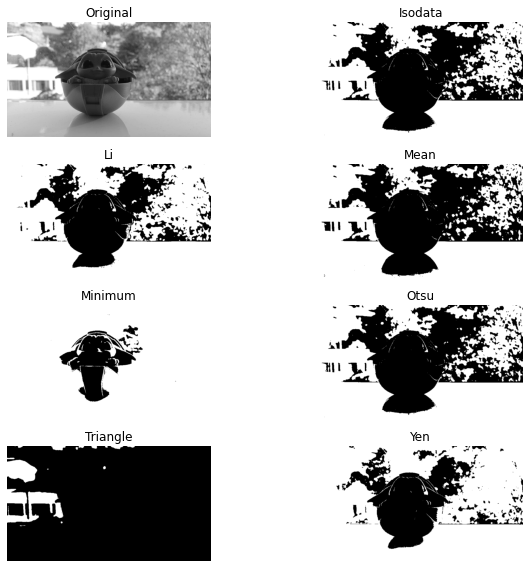

In [ ]:
# Segmentación Imagen 3
img = img3

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

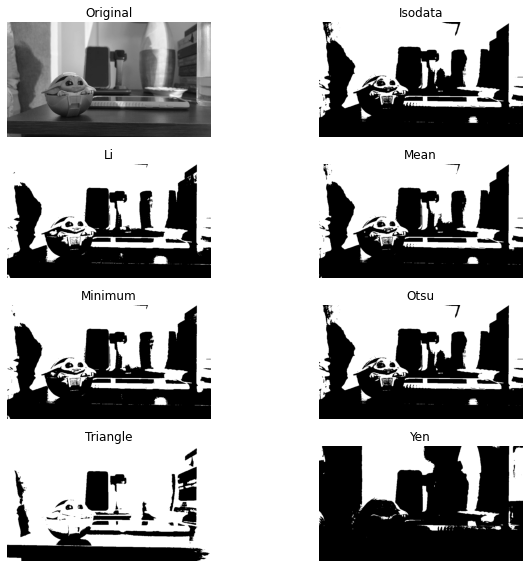

In [ ]:
# Segmentación Imagen 4
img = img4

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

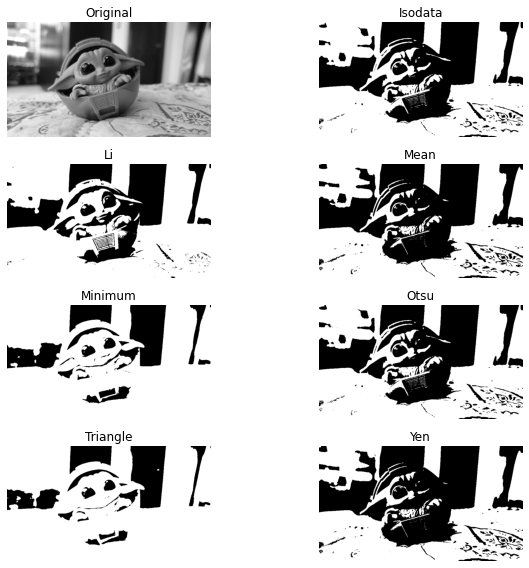

In [ ]:
# Segmentación Imagen 5
img = img5

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

## Conclusiones

1. Se observa la mejora en rendimiento para segmentación del método de multi threshold al añadir capas al análisis. Para las imágenes con fondo complejo, se observó un mejor rendimiento al segementar con 4 y 5 capas.

2. Se observa que el método de análisis por segmentación de imagen en diferentes sub-imágenes mejora el rendimiento de segmentación especialmente en imágenes con fondo complejo. Por ejemplo en la aplicación en la imagen 3.

3. Se observa que al tratarse de una segmentación por análisis de histograma, las imágenes con bajo contraste o con poco brillo en el objeto principal representan un reto para el método de segmentación por Otsu al confundirlo con el fondo en ciertos ejercicios. 